In [54]:
from pydtmc import MarkovChain
from networkx import DiGraph, get_edge_attributes,spring_layout, draw_networkx, draw_networkx_edge_labels, add_path
from matplotlib import pyplot
from numpy import random, ones, ndarray
from random import choice

https://github.com/TommasoBelluzzo/PyDTMC

We can create a directed weighted graph form scratch, where Markov chains can be deduced from the graph topology.
First, we will modelize clouds.
https://cartebateau.com/nuages

In [55]:
weather:DiGraph = DiGraph()

cloud_states:list[str] = [
    'Cirrus',
    'Cirrocumulus',
    'Cirrostratus',
    'Altocumulus',
    'Nimbostratus',
    'Altostratus',
    'Stratocumulus',
    'Stratus',
    'Cumulus',
    'Cumulonimbus'
]

weather.add_nodes_from(cloud_states)

# Creating artificial transition values
for state_a in cloud_states:
    distrib:ndarray = random.dirichlet(ones(len(cloud_states)),size=1)
    for i,state_b in enumerate(cloud_states):
        weather.add_edge(state_a,state_b,weight=distrib[0][i])


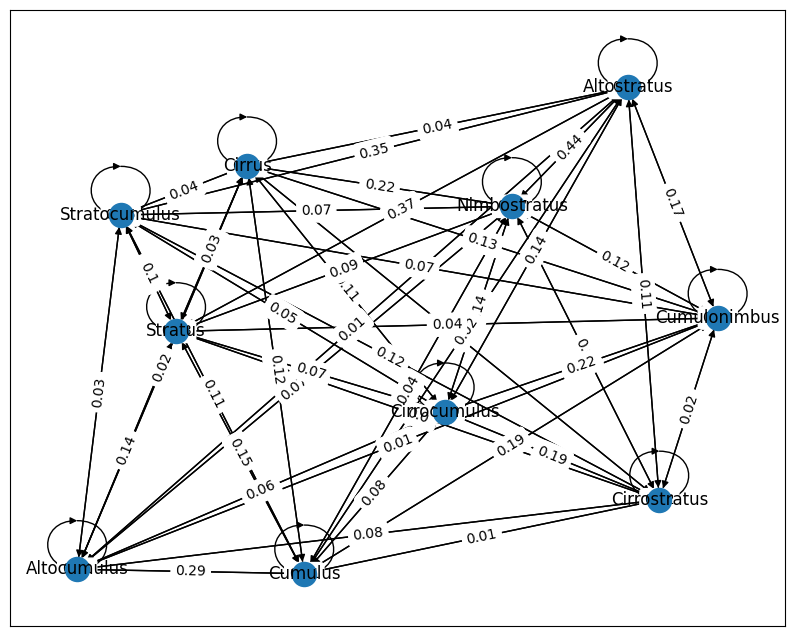

In [56]:
# Drawing the graph
pyplot.figure(figsize=(10,8))
pos=spring_layout(weather) # pos = nx.nx_agraph.graphviz_layout(G)
draw_networkx(weather,pos)
labels = get_edge_attributes(weather,'weight')
for key,value in labels.items():
    labels[key] = round(value,2)
draw_networkx_edge_labels(weather,pos,edge_labels=labels)
pyplot.show()

Creating the Markov chain

In [57]:
probabilities:list = [
        [
            get_edge_attributes(weather,'weight')[(state_a,state_b)] for state_b in cloud_states
        ] for state_a in cloud_states
    ]
mc = MarkovChain(probabilities, cloud_states)
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           10
 RANK:           10
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     NO
 SYMMETRIC:      NO



We can handle time and add its component to the Markov chain by changing the weights of the edges of the graph. Seasons can also have their influence, and so do temperature.

In [58]:
sequence:list[str] = [choice(cloud_states)]
for i in range(1, 11):
    current_state = sequence[-1]
    next_state = mc.next(current_state) # seed=32
    if next_state == current_state:
        # Do some subchain work
        pass
    sequence.append(next_state)

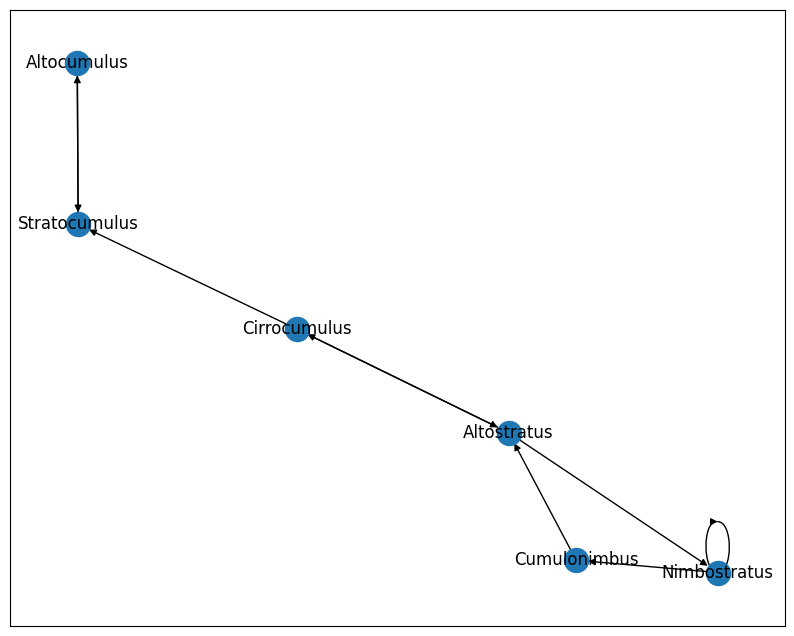

In [59]:
# Drawing the sequence
sequence_graph:DiGraph = DiGraph()
add_path(sequence_graph,sequence)
pyplot.figure(figsize=(10,8))
pos=spring_layout(sequence_graph)
draw_networkx(sequence_graph,pos)
pyplot.show()